# READ DATA

In [ ]:
import numpy as np
import pandas as pd
import random as rd
from google.colab import files

In [ ]:
files = pd.read_csv("water-treatment.csv", na_values='?')
theData = pd.DataFrame(files)
print(theData)

      D-1/3/90    44101  1.50  7.8      ?    407    166  66.3  4.5  2110  ...  \
0     D-2/3/90  39024.0  3.00  7.7    NaN  443.0  214.0  69.2  6.5  2660  ...   
1     D-4/3/90  32229.0  5.00  7.6    NaN  528.0  186.0  69.9  3.4  1666  ...   
2     D-5/3/90  35023.0  3.50  7.9  205.0  588.0  192.0  65.6  4.5  2430  ...   
3     D-6/3/90  36924.0  1.50  8.0  242.0  496.0  176.0  64.8  4.0  2110  ...   
4     D-7/3/90  38572.0  3.00  7.8  202.0  372.0  186.0  68.8  4.5  1644  ...   
..         ...      ...   ...  ...    ...    ...    ...   ...  ...   ...  ...   
521  D-26/8/91  32723.0  0.16  7.7   93.0  252.0  176.0  56.8  2.3   894  ...   
522  D-27/8/91  33535.0  0.32  7.8  192.0  346.0  172.0  68.6  4.0   988  ...   
523  D-28/8/91  32922.0  0.30  7.4  139.0  367.0  180.0  64.4  3.0  1060  ...   
524  D-29/8/91  32190.0  0.30  7.3  200.0  545.0  258.0  65.1  4.0  1260  ...   
525  D-30/8/91  30488.0  0.21  7.5  152.0  300.0  132.0  69.7  NaN  1073  ...   

       2000   ?.4  58.8  95

In [ ]:
theData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D-1/3/90  526 non-null    object 
 1   44101     508 non-null    float64
 2   1.50      523 non-null    float64
 3   7.8       526 non-null    float64
 4   ?         504 non-null    float64
 5   407       520 non-null    float64
 6   166       525 non-null    float64
 7   66.3      515 non-null    float64
 8   4.5       501 non-null    float64
 9   2110      526 non-null    int64  
 10  7.9       526 non-null    float64
 11  ?.1       487 non-null    float64
 12  228       526 non-null    int64  
 13  70.2      515 non-null    float64
 14  5.5       502 non-null    float64
 15  2120      526 non-null    int64  
 16  7.9.1     526 non-null    float64
 17  ?.2       499 non-null    float64
 18  280       517 non-null    float64
 19  94        524 non-null    float64
 20  72.3      513 non-null    float6

# DATA PREPARATION

DROP KOLOM DATE (DIMENSION REDUCTION)

In [ ]:
theData = theData.drop(columns = ['D-1/3/90'])

**CLEANING MISSING VALUE**

In [ ]:
theData.isna().sum()

44101    18
1.50      3
7.8       0
?        22
407       6
166       1
66.3     11
4.5      25
2110      0
7.9       0
?.1      39
228       0
70.2     11
5.5      24
2120      0
7.9.1     0
?.2      27
280       9
94        2
72.3     13
0.3      25
2010      0
7.3       1
?.3      22
84       18
21        5
81.0     17
0.02     28
2000      1
?.4      61
58.8      4
95.5     27
?.5      39
70.0     26
?.6      35
79.4     25
87.3      8
99.6     31
dtype: int64

In [ ]:
total = theData.isnull().sum().sort_values(ascending=False)
percent = (theData.isnull().sum()/theData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentation'])
missing_data

,Total,Percentation
?.4,61,0.115970
?.5,39,0.074144
?.1,39,0.074144
?.6,35,0.066540
99.6,31,0.058935
0.02,28,0.053232
?.2,27,0.051331
95.5,27,0.051331
70.0,26,0.049430
79.4,25,0.047529


MENGISI MISSING VALUE DENGAN MEAN

In [ ]:
for i in theData.columns :
  theData[i].fillna(theData[i].mean(), inplace = True)


In [ ]:
theData.isna().sum()

44101    0
1.50     0
7.8      0
?        0
407      0
166      0
66.3     0
4.5      0
2110     0
7.9      0
?.1      0
228      0
70.2     0
5.5      0
2120     0
7.9.1    0
?.2      0
280      0
94       0
72.3     0
0.3      0
2010     0
7.3      0
?.3      0
84       0
21       0
81.0     0
0.02     0
2000     0
?.4      0
58.8     0
95.5     0
?.5      0
70.0     0
?.6      0
79.4     0
87.3     0
99.6     0
dtype: int64

In [ ]:
print(theData)

       44101  1.50  7.8           ?    407    166  66.3       4.5  2110  7.9  \
0    39024.0  3.00  7.7  188.714286  443.0  214.0  69.2  6.500000  2660  7.7   
1    32229.0  5.00  7.6  188.714286  528.0  186.0  69.9  3.400000  1666  7.7   
2    35023.0  3.50  7.9  205.000000  588.0  192.0  65.6  4.500000  2430  7.8   
3    36924.0  1.50  8.0  242.000000  496.0  176.0  64.8  4.000000  2110  7.9   
4    38572.0  3.00  7.8  202.000000  372.0  186.0  68.8  4.500000  1644  7.8   
..       ...   ...  ...         ...    ...    ...   ...       ...   ...  ...   
521  32723.0  0.16  7.7   93.000000  252.0  176.0  56.8  2.300000   894  7.7   
522  33535.0  0.32  7.8  192.000000  346.0  172.0  68.6  4.000000   988  7.8   
523  32922.0  0.30  7.4  139.000000  367.0  180.0  64.4  3.000000  1060  7.5   
524  32190.0  0.30  7.3  200.000000  545.0  258.0  65.1  4.000000  1260  7.4   
525  30488.0  0.21  7.5  152.000000  300.0  132.0  69.7  4.594012  1073  7.4   

     ...    2000        ?.4  58.8      

HANDLING OUTLIERS DATA DENGAN METODE INTER QUARTIL RANGE

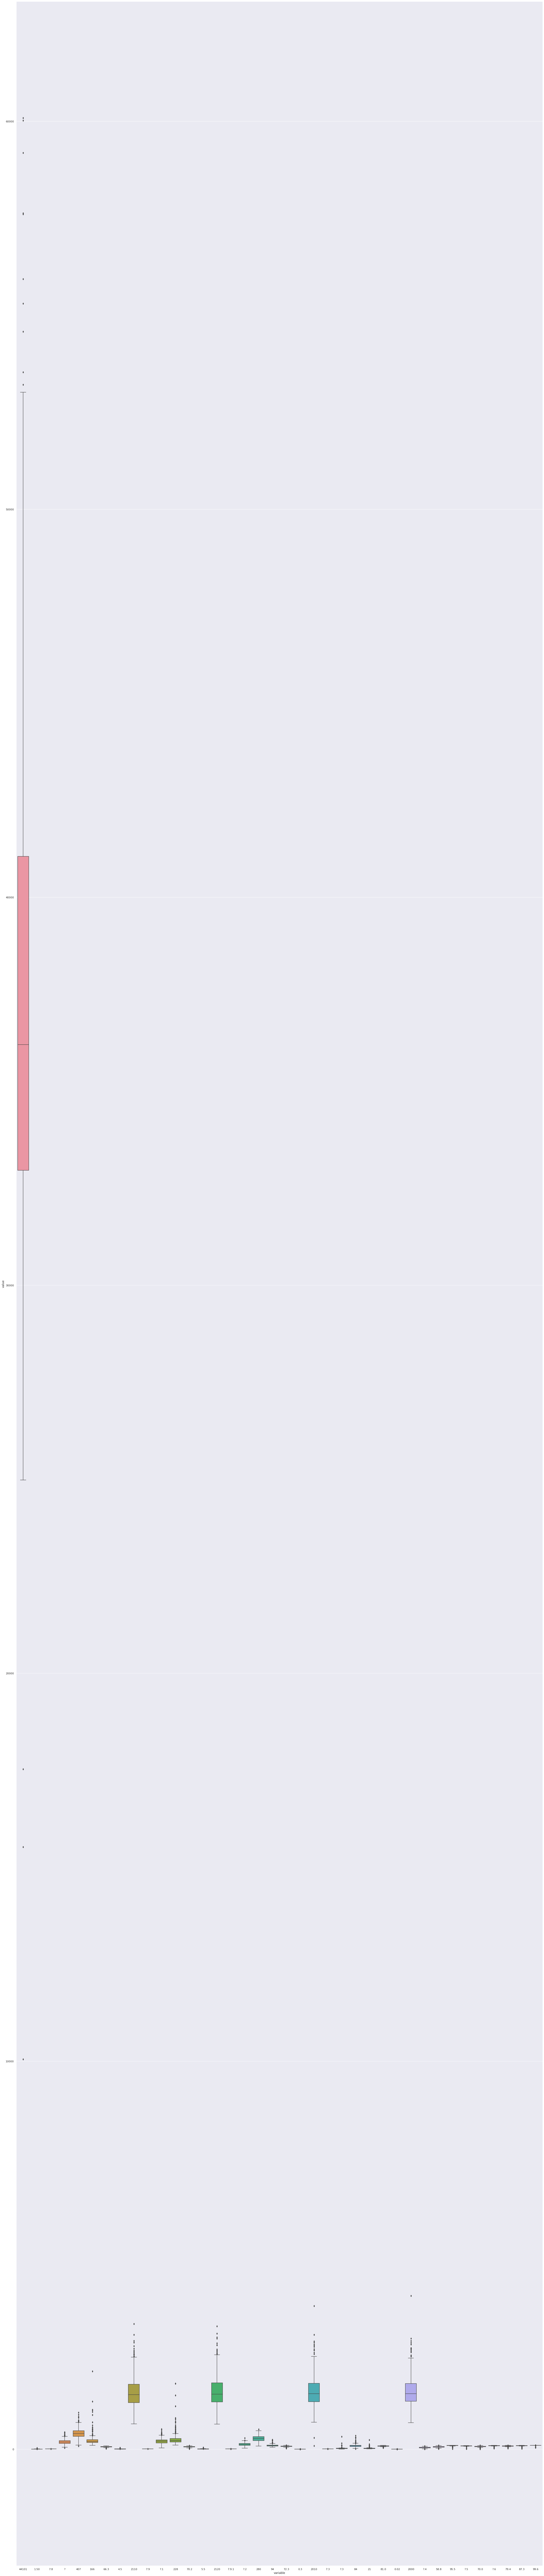

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot(df):
    sns.set(rc={'figure.figsize':(40,200)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()



boxplot(theData)

In [ ]:
for i in theData.columns:
  Q1 = theData[i].quantile(0.25)
  Q3 = theData[i].quantile(0.75)
  IQR = Q3-Q1

  Smallest = Q1 - (IQR *1.5) 
  Biggest = Q3 + (IQR * 1.5)

  theData.loc[theData[i] > Biggest , i] = Biggest 
  theData.loc[theData[i] < Smallest , i] = Smallest

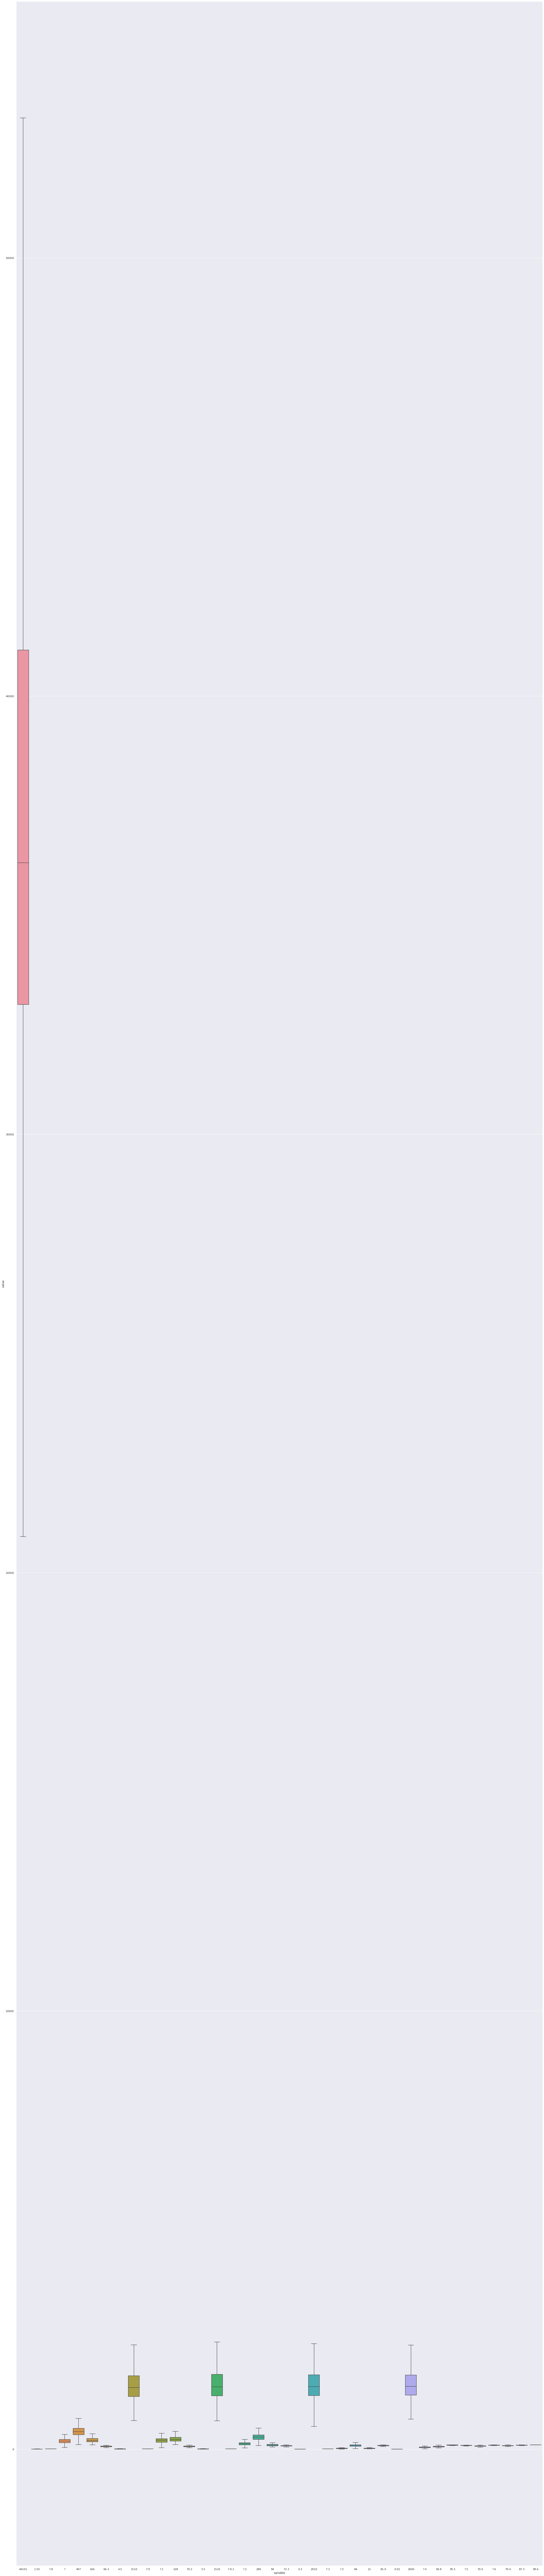

In [ ]:
boxplot(theData)

## PROSES NORMALISASI DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledData = scaler.fit_transform(theData)
scaledData

array([[ 0.29689977,  0.52013956, -0.44955029, ...,  0.17207592,
         0.49535093,  0.84250037],
       [-0.79891395,  1.70100478, -0.85795003, ..., -0.33877402,
        -0.23544683, -1.85028262],
       [-0.34833212,  0.81535587,  0.3672492 , ...,  0.55866507,
        -0.04200037,  0.84250037],
       ...,
       [-0.68715546, -1.07402848, -1.67474951, ..., -0.15928621,
        -0.19245873, -0.95268829],
       [-0.80520339, -1.07402848, -2.08314925, ...,  1.20758256,
        -0.06349442,  0.48346264],
       [-1.07968094, -1.12716742, -1.26634977, ...,  0.47582453,
        -0.72981002, -0.79964392]])

# ELBOW METHOD (menentukan jumlah cluster yang ideal)

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

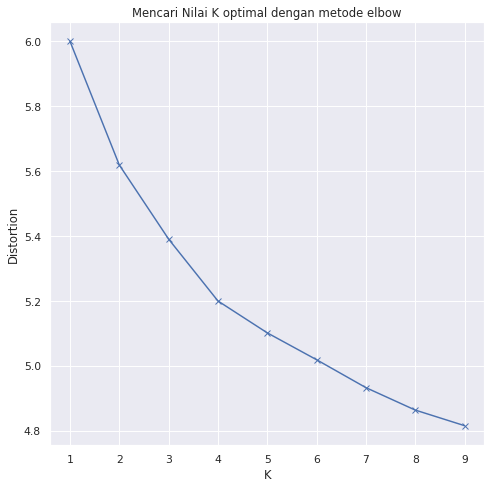

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaledData)
    kmeanModel.fit(scaledData)
    distortions.append(sum(np.min(cdist(scaledData, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaledData.shape[0])

plt.figure(figsize=(8, 8), dpi=70)
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Mencari Nilai K optimal dengan metode elbow')

plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA #import library PCA

In [ ]:
datapca = theData.copy()
datapca[datapca.columns] = StandardScaler().fit_transform(datapca)
print(datapca.describe())

              44101          1.50           7.8             ?           407  \
count  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02   
mean   1.350842e-17  1.654781e-16 -2.591083e-15 -7.091919e-17 -3.917441e-16   
std    1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00   
min   -2.638534e+00 -1.192115e+00 -3.308348e+00 -2.622387e+00 -2.656038e+00   
25%   -6.811886e-01 -7.197689e-01 -8.579500e-01 -6.905547e-01 -6.928891e-01   
50%   -1.587620e-01 -3.655094e-01 -4.115054e-02 -4.661049e-02 -4.509375e-02   
75%    6.237087e-01  5.201396e-01  7.756489e-01  5.973337e-01  6.158771e-01   
max    2.581055e+00  2.380002e+00  3.226047e+00  2.529166e+00  2.579026e+00   

                166          66.3           4.5          2110           7.9  \
count  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02   
mean  -2.904310e-16  1.080673e-16 -1.232643e-16  6.754209e-18 -6.038262e-15   
std    1.000952e+00  1.000952e+00  1.000952e+00  1.

In [ ]:
pca2 = PCA(n_components=4)
pca2_result = pca2.fit_transform(datapca)
print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca2.explained_variance_ratio_)))

Explained variation per principal component: [0.20017641 0.13986918 0.12174347 0.07822314]
Cumulative variance explained by 2 principal components: 54.00%


In [ ]:
datasetPca = pd.DataFrame(abs(pca2.components_), columns= datapca.columns, index=['PC_1', 'PC_2', 'PC_3', 'PC_4'])
print(datasetPca)

         44101      1.50       7.8         ?       407       166      66.3  \
PC_1  0.098995  0.058447  0.167232  0.247300  0.270169  0.100103  0.154842   
PC_2  0.028918  0.073075  0.011925  0.034837  0.053998  0.267129  0.229269   
PC_3  0.038805  0.024560  0.209411  0.031946  0.094559  0.243026  0.190623   
PC_4  0.226064  0.001615  0.154723  0.177814  0.149346  0.013316  0.149788   

           4.5      2110       7.9  ...      2000       ?.4      58.8  \
PC_1  0.217516  0.241087  0.163682  ...  0.240136  0.002370  0.018986   
PC_2  0.167919  0.006616  0.001568  ...  0.016945  0.176383  0.258709   
PC_3  0.133827  0.016669  0.225287  ...  0.009208  0.071340  0.225696   
PC_4  0.109416  0.346425  0.154463  ...  0.337505  0.047267  0.080957   

          95.5       ?.5      70.0       ?.6      79.4      87.3      99.6  
PC_1  0.024757  0.097322  0.084809  0.073021  0.071309  0.006638  0.030510  
PC_2  0.134328  0.141105  0.116200  0.226957  0.221430  0.365195  0.167505  
PC_3  0.1438

In [ ]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (datasetPca[datasetPca > 0.2].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (datasetPca[datasetPca > 0.2].iloc[1]).dropna())
print('\n\nAs per PC 3:\n', (datasetPca[datasetPca > 0.2].iloc[2]).dropna())
print('\n\nAs per PC 4:\n', (datasetPca[datasetPca > 0.2].iloc[3]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 ?       0.247300
407     0.270169
4.5     0.217516
2110    0.241087
?.1     0.245123
5.5     0.209663
2120    0.245810
?.2     0.278357
280     0.290849
2010    0.257148
2000    0.240136
Name: PC_1, dtype: float64


As per PC 2:
 166     0.267129
66.3    0.229269
228     0.277253
70.2    0.258941
?.3     0.214877
21      0.248493
58.8    0.258709
?.6     0.226957
79.4    0.221430
87.3    0.365195
Name: PC_2, dtype: float64


As per PC 3:
 7.8      0.209411
166      0.243026
7.9      0.225287
228      0.262684
7.9.1    0.229141
?.3      0.248567
84       0.235241
21       0.268026
58.8     0.225696
?.5      0.252965
70.0     0.240079
Name: PC_3, dtype: float64


As per PC 4:
 44101    0.226064
2110     0.346425
2120     0.348610
2010     0.327959
2000     0.337505
79.4     0.220221
Name: PC_4, dtype: float64

******************************************************************


In [ ]:
print(pca2)

PCA(n_components=4)


In [ ]:
(pca2_result)

array([[ 4.13634257,  0.04102438, -0.07052118,  1.61596502],
       [ 0.7673864 ,  1.99258284,  1.68208092,  0.21909387],
       [ 4.17391905, -0.10985716, -0.28482591,  0.85829431],
       ...,
       [-3.25333396,  2.02162374,  1.61541062, -1.21255944],
       [-1.56486144, -0.18944276,  1.4528568 , -1.68816673],
       [-3.03084206,  1.350001  ,  0.77479081, -2.65037973]])

# CLUSTERING

**K-MEANS CLUSTERING**

In [ ]:
from collections import defaultdict

In [ ]:
K = 4 #JUMLAH KLUSTER OPTIMAL BERDASARKAN ELBOW METHOD
m = 527 #matrix size
X = pca2_result

#array untuk menyimpan nilai centroids
centroid = np.array([]).reshape(4,0)

#menggenerate nilai centroid
for i in range(K):
  rand=rd.randint(0,m-1)
  centroid=np.c_[centroid,X[rand]]

iterasi = 100 #menentukan jumlah iterasi
output = defaultdict()
output = {}

for j in range (iterasi) :
  Euclidian = np.array([]).reshape(m,0)  #aray menampung jarak euclidian
  for k in range(K) :
    tempDist=np.sum((X-centroid[:,k])**2,axis=1)
    Euclidian=np.c_[Euclidian,tempDist]

  C=np.argmin(Euclidian,axis=1)+1  
  
  y = {}

  for k in range(K):
    y[k+1]=np.array([]).reshape(4,0)
  for i in range(m):
    y[C[i]]=np.c_[y[C[i]],X[i]]
  for k in range(K):
    y[k+1]=y[k+1].T
  for k in range(K):
    centroid[:,k]=np.mean(y[k+1],axis=0)
        
  output=y

ValueError: ignored

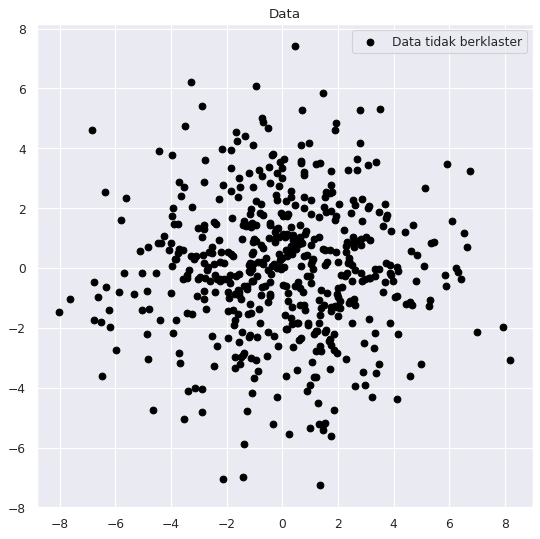

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X[:,0],X[:,1],c='black',label='Data tidak berklaster')
plt.legend()
plt.title('Data')
plt.show()


In [ ]:
color=['red','blue', 'green','yellow']
labels=['cluster1','cluster2','cluster3','cluster4']
plt.figure(figsize=(8, 8), dpi=80)
for k in range(K):
    plt.scatter(output[k+1][:,0],output[k+1][:,1] ,c=color[k],label=labels[k])
plt.scatter(centroid[0,:],centroid[1,:],s=300,c='black',label='Centroids')
plt.legend()
plt.show()

KeyError: ignored

<Figure size 640x640 with 0 Axes>

# EVALUASI CLUSTERING DENGAN NILAI METODE SILHOUTTE

In [ ]:
from sklearn.metrics import silhouette_score
kmean = KMeans(n_clusters = 3, random_state = 1)
kmean.fit_predict(scaledData)
print("Nilai Silhouette untuk n-cluster = 3 adalah ")
print(silhouette_score(scaledData, kmean.labels_))

kmean = KMeans(n_clusters = 4, random_state = 1)
kmean.fit_predict(scaledData)
print("Nilai Silhouette untuk n-cluster = 4 adalah ")
print(silhouette_score(scaledData, kmean.labels_))

kmean = KMeans(n_clusters = 5, random_state = 1)
kmean.fit_predict(scaledData)
print("Nilai Silhouette untuk n-cluster = 5 adalah ")
print(silhouette_score(scaledData, kmean.labels_))

kmean = KMeans(n_clusters = 7, random_state = 1)
kmean.fit_predict(scaledData)
print("Nilai Silhouette untuk n-cluster = 7 adalah ")
print(silhouette_score(scaledData, kmean.labels_))

Nilai Silhouette untuk n-cluster = 3 adalah 
0.10547559696945132
Nilai Silhouette untuk n-cluster = 4 adalah 
0.11064145483830254
Nilai Silhouette untuk n-cluster = 5 adalah 
0.09966813536324551
Nilai Silhouette untuk n-cluster = 7 adalah 
0.08402831417214864
